In [138]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install numpy
!pip install plotly express
!pip install scikit-learn
!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=a30a2923b4388d5a8111063a3be036c0b84ea609575f00c359209801990e87bb
  Stored in directory: /home/jp/.cache/pip/wheels/9b/13/01/6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def getModule(x,y):
    return np.sqrt(x**2 + y**2)

In [4]:
def getDf(df, first):
    dfplot = pd.DataFrame(columns=['posicao', 'velocidade'])
    for i in range(len(df)):
        x = df.iloc[i][0] - first[0]
        y = df.iloc[i][1] - first[1]
        v = df.iloc[i][2] 
        module = getModule(x,y)
        dfplot.loc[i] = [module, v]
    return dfplot

In [442]:
df = pd.read_csv('/home/jp/Documents/ssl-unification/bin/csv/4.csv', header= None)
df = getDftoIntercept(df)
#df.drop_duplicates(subset=['posicao'], keep='first', inplace=True)
fig = px.line(df,x='posicao',y='velocidade')
fig.show()

In [436]:
print(df.iloc[45])

posicao       5094.020296
velocidade       5.403020
Name: 62, dtype: float64


In [379]:
print(df.iloc[int(len(df)/24)])
print(df.iloc[int(len(df)/17)])

posicao       1040.391415
velocidade       7.299550
Name: 10, dtype: float64
posicao       1154.142044
velocidade       7.299670
Name: 11, dtype: float64


In [437]:
start = [(0, 14), (3, 20), (10, 17), (10,20), (7, 25)]
stop = [(100, 200), (21, 150), (40, 100), (45, 81), (45, 60)]

14

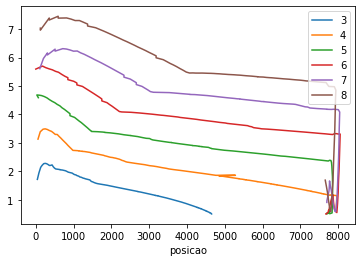

In [5]:
dataframes = []
firsts = []
ax = plt.subplot()
for i in range(3,9):
    dataframes.append(pd.read_csv('/home/jp/Documents/ssl-unification/bin/csv/'+str(i)+'.csv', header= None))
    firsts.append(dataframes[len(dataframes)-1].iloc[0])
    dataframes[len(dataframes)-1].drop(0, axis=0, inplace= True)
    dataframes[len(dataframes)-1] = getDf(dataframes[len(dataframes)-1], firsts[len(firsts)-1])
    ax = dataframes[len(dataframes)-1].plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line', label = str(i))


In [396]:
def getDftoIntercept(dfregressao):
    dfregressao1 = pd.DataFrame(columns=['posicao', 'velocidade'])
    start = dfregressao.iloc[0]
    dfregressao.drop(0, axis=0, inplace= True)
    dfregressao1 = getDf(dfregressao, start)
    max = dfregressao1.max(axis=0)[1]
    index = dfregressao1[dfregressao1['velocidade'] == max].index[0]
    dfregressao1 = dfregressao1.iloc[index:]
    return dfregressao1.drop_duplicates(subset=['posicao'], keep='first', inplace=False)
    

In [7]:
def getA(x,y,x2,y2):
    return (y2-y)/(x2-x)
def getB(a,x,y):
    return y - a*x
def reta(a,b,x):
    return a*x + b

In [8]:
def getRegressao(a, b, r):
    dfreta = pd.DataFrame(columns=['posicao', 'velocidade'])
    for i in range(r):
        y = reta(a,b,i)
        dfreta.loc[i] = [i, y]
    return dfreta


In [9]:
def getInterception(a,b,a1,b1):
    x = (b-b1)/(a1-a)
    y = reta(a,b,x)
    return(x,y)

In [343]:
dfprecision = []
forcas = []
for i in range(4,9):
    dataframe = pd.read_csv('/home/jp/Documents/ssl-unification/bin/csv/'+str(i)+'.csv', header= None)
    dfprecision.append(getDftoIntercept(dataframe))
    forcas.append(i)

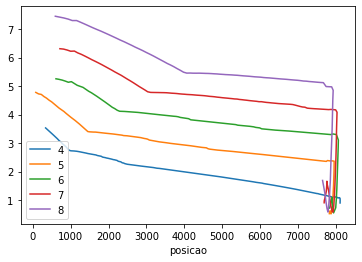

In [344]:
ax = plt.subplot()
for i in range(len(dfprecision)):
    ax = dfprecision[i].plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line', label = str(forcas[i]))
    

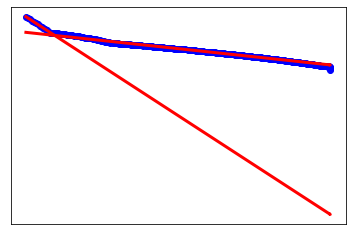

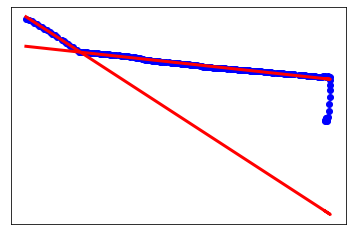

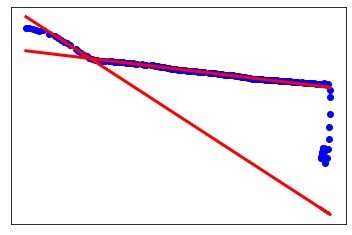

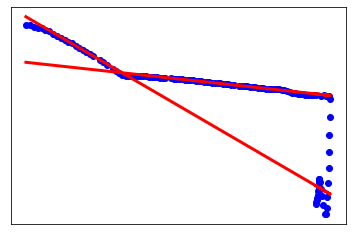

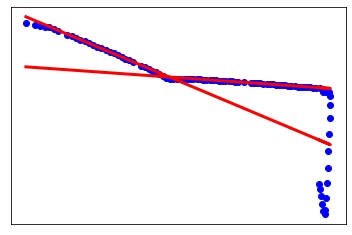

In [443]:
angular1 = []
angular2 = []
linear1 = []
linear2 = []
count = 0
for i in dfprecision:
    points1 = i.iloc[start[count][0]:start[count][1]]
    points2 = i.iloc[stop[count][0]: stop[count][1]]
    reg = linear_model.LinearRegression()
    reg2 = linear_model.LinearRegression()
    reg.fit(points1[['posicao']], points1[['velocidade']])
    reg2.fit(points2[['posicao']], points2[['velocidade']])
    angular1.append(reg.coef_)
    angular2.append(reg2.coef_)
    linear1.append(reg.intercept_)
    linear2.append(reg2.intercept_)
    plt.scatter(i['posicao'], i['velocidade'], color='blue')
    plt.plot(i['posicao'], reg.predict(i[['posicao']]), color='red', linewidth=3)
    plt.plot(i['posicao'], reg2.predict(i[['posicao']]), color='red', linewidth=3)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    count += 1

In [444]:
interceptions = pd.DataFrame(columns=['x', 'y'])
retas1 = []
retas2 = []

for i in range(len(angular1)):
    point = (getInterception(float(angular1[i]), float(linear1[i]), float(angular2[i]), float(linear2[i])))
    interceptions.loc[i] = [point[0], point[1]]
    retas1.append(getRegressao(float(angular1[i]), float(linear1[i]), 8000))
    retas2.append(getRegressao(float(angular2[i]), float(linear2[i]), 8000))


    

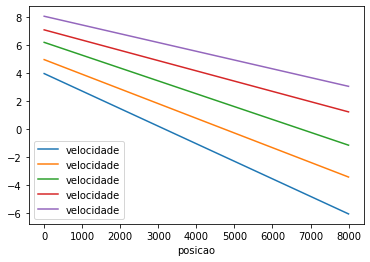

In [445]:
ax = plt.subplot()
for i in retas1:
    ax = i.plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line')

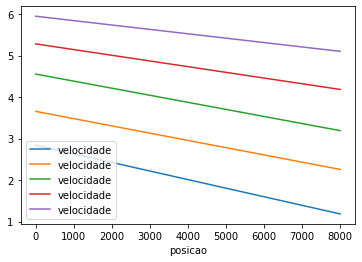

In [446]:
ax = plt.subplot()
for i in retas2:
    ax = i.plot(ax = ax, x = 'posicao',y = 'velocidade', kind = 'line')

<AxesSubplot:xlabel='x', ylabel='y'>

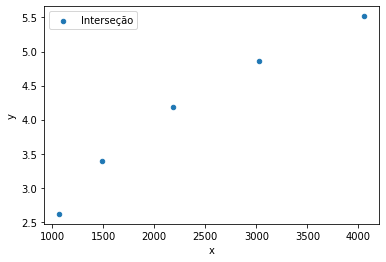

In [447]:
interceptions.plot(x = 'x',y = 'y', kind = 'scatter', label = 'Interseção')

In [448]:
reta1a = pd.DataFrame(columns=['forca', 'angular'])
reta2a = pd.DataFrame(columns=['forca', 'angular'])
for i in range(5):
    reta1a.loc[i] = [forcas[i], angular1[i]]
for i in range(5):
    reta2a.loc[i] = [forcas[i], angular2[i]]
rega1 = linear_model.LinearRegression()
rega2 = linear_model.LinearRegression()
rega1.fit(reta1a[['forca']], reta1a[['angular']])
rega2.fit(reta2a[['forca']], reta2a[['angular']])

LinearRegression()

In [449]:
reta1b = pd.DataFrame(columns=['forca', 'linear'])
reta2b = pd.DataFrame(columns=['forca', 'linear'])
for i in range(5):
    reta1b.loc[i] = [forcas[i], linear1[i]]
for i in range(5):
    reta2b.loc[i] = [forcas[i], linear2[i]]
regb1 = linear_model.LinearRegression()
regb2 = linear_model.LinearRegression()
regb1.fit(reta1b[['forca']], reta1b[['linear']])
regb2.fit(reta2b[['forca']], reta2b[['linear']])


LinearRegression()

In [450]:
a = regb1.predict(reta1b[['forca']])
b = regb2.predict(reta2b[['forca']])

In [451]:
def predictb1(x):
    return float(regb1.coef_*x + regb1.intercept_)
def predictb2(x):
    return float(regb2.coef_*x + regb2.intercept_)
def predicta1(x):
    return float(rega1.coef_*x + rega1.intercept_)
def predicta2(x):
    return float(rega2.coef_*x + rega2.intercept_)

In [452]:
def reta1(x, f):
    return predicta1(f)*x +predictb1(f)
def reta2(x,f):
    return predicta2(f)*x +predictb2(f)

In [453]:
def speed(x, f):
    x_intersection = getInterception(predicta1(f), predictb1(f), predicta2(f), predictb2(f))[0]
    if(x < x_intersection):
        return reta1(x, f)
    if(x > x_intersection):
        return reta2(x, f)

In [454]:
predforcas = [4,5,6,7,8]
estimated = []
for i in predforcas:
    testFunction = pd.DataFrame(columns=['posicao', 'velocidade predita'])
    for j in range(len(dfprecision[0])):
        testFunction.loc[j] = [dfprecision[0]['posicao'].iloc[j], float(speed(dfprecision[0]['posicao'].iloc[j], i))]
    estimated.append(testFunction)


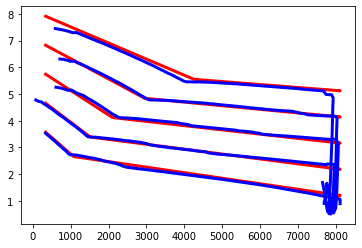

In [455]:
ax = plt.subplot()
for i in estimated:
    plt.plot(i['posicao'], i['velocidade predita'], color='red', linewidth=3)
for i in dfprecision:
    plt.plot(i['posicao'],i['velocidade'], color = 'blue', linewidth=3)
plt.show()